<a href="https://colab.research.google.com/github/flying-bear/kompluxternaya/blob/master/assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3

1. Implement Logistic Regression with Stochastic Gradient Decent using numpy
1. Implement Logistic Regression with early stopping using pytorch

Additional readings:
1. https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/VectorizedOperations.html
1. https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_20newsgroups
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings

warnings.simplefilter("error")

# retrieve dataset
data = fetch_20newsgroups()


X_train = data['data']
y_train = data['target']

tfidf = TfidfVectorizer(max_df=0.5, min_df=10)
X_train = tfidf.fit_transform(X_train)

test_data = fetch_20newsgroups(subset='test')
X_test = tfidf.transform(test_data['data'])
y_test = test_data['target']

## 1 Binary Logistic Regression
$\{(x_i, y_i)\}_{i=1}^N$, $y \in \{0,1\}$
$$ z = Xw + b $$

$$p(y=1 | x) = \sigma(z) = \frac 1 {1 + e^{-z}}$$

$$ L_{batch} = - \frac 1 {|batch|} \sum_{i \in batch}^N [ y_i \log \sigma(z_i) + (1 - y_i) \log (1 - \sigma(z_i)) ] + \frac \lambda 2 w^T w$$

Stochastic Gradient Decent for logreg:
1. init w ~ random N(0,1), b = 0
1. for epoch = 1..n_epochs:
    * shuffle dataset
    * for every batch:
        * $w^{(t)} \leftarrow w^{(t-1)} - \alpha \nabla_{w} L_{batch}(w^{(t-1)},b^{(t-1)})$
        * $b^{(t)} \leftarrow b^{(t-1)} - \alpha \nabla_{b} L_{batch}(w^{(t-1)},b^{(t-1)})$
        
$w$ - weights  
$b$ - biases  
$\alpha$ - learning rate

Hint:
$$\nabla_w L = \frac {\partial L} {\partial \sigma} \frac {\partial \sigma} {\partial z} \frac {\partial z} {\partial w} + \frac {\partial (\frac \lambda 2 w^T w)} {\partial w} $$
$$\nabla_b L = \frac {\partial L} {\partial \sigma} \frac {\partial \sigma} {\partial z} \frac {\partial z} {\partial b} $$

In [5]:
# make dataset for binary classification

X_train_bin = X_train[y_train < 2]
y_train_bin = y_train[y_train < 2]

X_test_bin = X_test[y_test < 2]
y_test_bin = y_test[y_test < 2]

y_train_bin.shape, y_test_bin.shape

((1064,), (708,))

In [6]:
print(f'X shape: {X_train_bin.shape}')
print(f'y shape: {y_train_bin.shape}')
w_test_size = np.random.randn(X_train_bin.shape[1])
print(f'w shape: {w_test_size.shape}')
print(f'Xw shape: {(X_train_bin.dot(w_test_size)).shape}')

X shape: (1064, 15566)
y shape: (1064,)
w shape: (15566,)
Xw shape: (1064,)


In [0]:
# TRY TO IMPLEMENT LOSS on some 64 datapoints

llambda = 1
test_batch_X = X_train_bin[64:128, :]
test_batch_y = y_train_bin[64:128]
w = np.random.randn(test_batch_X.shape[1])
b = 0

In [0]:
def count_loss(batch_X, batch_y, w, b, llambda, batch_size):
  z = batch_X.dot(w) + b
  sigm = 1 / (1 + np.exp(-z))
  loss = (-1/batch_size) * (np.sum(batch_y*np.log(sigm) + (1-batch_y)*(np.log(1-sigm)))).item() + (llambda/2) * w.transpose().dot(w)
  return loss, sigm

In [9]:
test_loss, test_sigm = count_loss(test_batch_X, test_batch_y, w, b, llambda, test_batch_y.shape[0])
test_loss

7914.598089124795

**Gradient formulae**

$$\nabla_w L = \frac {\partial L} {\partial \sigma} \frac {\partial \sigma} {\partial z} \frac {\partial z} {\partial w} + \frac {\partial (\frac \lambda 2 w^T w)} {\partial w} $$
$$\nabla_b L = \frac {\partial L} {\partial \sigma} \frac {\partial \sigma} {\partial z} \frac {\partial z} {\partial b} $$

Посчитаем части формул
$$ L_{batch} = - \frac 1 {|batch|} \sum_{i \in batch}^N [ y_i \log \sigma(z_i) + (1 - y_i) \log (1 - \sigma(z_i)) ] + \frac \lambda 2 w^T w$$

$$\frac {\partial} {\partial \sigma}[y \log \sigma(z) + (1 - y) \log (1 - \sigma(z))] = \frac {y}{\sigma} + \frac {-1 \cdot (1 - y)}{1 - \sigma} = \frac {y(1 - \sigma) - \sigma(1 - y)} {\sigma(1 - \sigma)} = \frac {y - \sigma y - \sigma + \sigma y}{\sigma(1 - \sigma)} = \frac {y - \sigma}{\sigma(1 - \sigma)}$$

$$\frac {\partial L} {\partial \sigma} = -\frac {1} {|batch|} \sum_{i \in batch}^N \frac {y_i - \sigma(z_i)} {\sigma (1 - \sigma(z_i))}$$

$$\frac {\partial \sigma} {\partial z} = \frac 1 {1 + e^{-z}} \frac {e^{-z}} {(1 + e^{-z})^2} ={\sigma}({1 - \sigma})$$

$$ \frac {\partial z} {\partial w} = X^T $$

$$ \frac {\partial (\frac \lambda 2 w^T w)} {\partial w} = \lambda w$$

$$ \frac {\partial z} {\partial b} = 1 $$
Identity matrix


Соберём вместе

$$\nabla_w L = \frac {- \sigma (1 - \sigma) X^T} {|batch|} \sum_{i \in batch}^N [\frac {y_i - \sigma_i} {\sigma_i (1 - \sigma_i)}] +  \lambda w$$
$$\nabla_b L = \frac {-\sigma (1 - \sigma)} {|batch|} \sum_{i \in batch}^N [\frac {y_i - \sigma_i} {\sigma_i (1 - \sigma_i)}]$$




In [10]:
# TRY TO IMPLEMENT GRADIENT
batch_size = test_batch_y.shape[0]
test_dL_dsigm = (-1/batch_size) * np.sum((test_batch_y - test_sigm)/(test_sigm * (1-test_sigm)))
test_dsigm_dz = test_sigm * (1 - test_sigm)
test_grad_w = test_dL_dsigm * test_batch_X.transpose().dot(test_dsigm_dz) + llambda * w
test_grad_b = test_dL_dsigm * test_dsigm_dz.dot(np.ones(test_dsigm_dz.shape[0]))

test_grad_w.shape

(15566,)

In [11]:
# COMPARE LOSS BEFORE AND AFTER SGD
print(count_loss(test_batch_X, test_batch_y, w, b, llambda, test_batch_y.shape[0])[0])
print(count_loss(test_batch_X, test_batch_y, w-0.0001*test_grad_w, b-0.0001*test_grad_b, llambda, test_batch_y.shape[0])[0])

7914.598089124795
7913.015275152144


[gradient checking](https://datascience-enthusiast.com/DL/Improving_DeepNeural_Networks_Gradient_Checking.html)


In [0]:

class LogRegNumpy(ClassifierMixin):
    def __init__(self, llambda=1, lr=0.0001, batch_size=32, n_epochs=100):
        """
        llambda: regularization strength
        lr: learning rate
        """
        self.w = None
        self.b = 0
        self.llambda = llambda
        self.n_epochs = n_epochs
        self.lr = lr
        self.history = []
        self.batch_size = batch_size

    @staticmethod
    def sigmoid(z):
      return 1 / (1 + np.exp(-z))
    
    def batch_loss(self, batch_X, batch_y, w, b, llambda, batch_size):
      """
      calculates loss over a batch with regularization
      :param batch_X: batch data, np.ndarray of shape (batch size, number of features)
      :param batch_y: batch labels, np.ndarray of shape (batch size,)
      :param w: weigths matrix, np.ndarray of shape (number of features,)
      :param b: bias, a number (int or float)
      :param llambda: regularizartion strength, a number (int or float)
      :param batch_size: batch size, int

      :return loss: loss, float
      :return sigm: predictions, np.ndarray of shape (batch size,)
      :return z: sigmoid logit, np.ndarray of shape (batch size,)
      """
      z = batch_X.dot(w) + b
      # if np.isnan(np.sum(z)):
      #   return
      sigm = self.sigmoid(z)
      reg = (llambda/2) * w.transpose().dot(w)
      loss = (-1/batch_size) * (np.sum(batch_y*np.log(sigm) + (1-batch_y)*(np.log(1-sigm)))).item() + reg
      return loss, sigm, z

    def fit(self, X, y):
        self.w = np.random.randn(X.shape[1])
        self.b = 0
        
        for epoch in range(self.n_epochs):
            
            # random permutation over indices of dataset
            batch_indices = np.random.permutation(len(y))
            
            for j in range(0, len(y), self.batch_size):
                batch_idx = batch_indices[j:j+self.batch_size]
                batch_X = X[batch_idx]
                batch_y = y[batch_idx]
            
                # forward pass
                # <TODO> [1 point] calculate batch loss
                loss, sigm, z = self.batch_loss(batch_X, batch_y, self.w, self.b, self.llambda, self.batch_size)

                # backward pass
                # <TODO> [2 points] calculate batch gradients 
                dL_dsigm = (-1/self.batch_size) * np.sum((batch_y - sigm)/(sigm * (1-sigm)))
                dsigm_dz = sigm * (1 - sigm)
                grad_w = dL_dsigm * batch_X.transpose().dot(dsigm_dz) + self.llambda * self.w
                grad_b = dL_dsigm * dsigm_dz.dot(np.ones(dsigm_dz.shape[0]))

                # # check gradient of b
                # epsilon = 1e-7  # (is this epsilon small enough?)
                # b_minus_step_loss = self.batch_loss(batch_X, batch_y, self.w, self.b-epsilon, self.llambda, self.batch_size)[0]
                # b_plus_step_loss = self.batch_loss(batch_X, batch_y, self.w, self.b+epsilon, self.llambda, self.batch_size)[0]
                # approximate_grad_b = (b_plus_step_loss - b_minus_step_loss)/ (2*epsilon)
                # print(grad_b, approximate_grad_b)
                # b_difference = abs(grad_b-approximate_grad_b)/(abs(grad_b)+abs(approximate_grad_b))
                # assert b_difference < epsilon, f"approximated gradient for b differs from calculated by {b_difference}"

                # # check gradient of w
                # param_num = self.w.shape[0]
                # w_plus_step_loss = np.zeros(param_num)
                # w_minus_step_loss = np.zeros(param_num)
                # approximate_grad_w = np.zeros(param_num)
                # for i in range(param_num):
                #   check_w_plus = np.copy(self.w)
                #   check_w_plus[i] += epsilon
                #   w_plus_step_loss[i] = self.batch_loss(batch_X, batch_y, check_w_plus, self.b, self.llambda, self.batch_size)[0]

                #   check_w_minus = np.copy(self.w)
                #   check_w_minus[i] -= epsilon
                #   w_minus_step_loss[i] = self.batch_loss(batch_X, batch_y, check_w_minus, self.b, self.llambda, self.batch_size)[0]

                #   approximate_grad_w[i] = (w_plus_step_loss[i] - w_minus_step_loss[i]) / (2 * epsilon)
                # w_difference = np.linalg.norm(grad_w - approximate_grad_w) / (np.linalg.norm(grad_w) + np.linalg.norm(approximate_grad_w))
                # assert w_difference < epsilon,  f"approximated gradient for w differs from calculated by {w_difference}"

                # SGD optimization step
                # <TODO> [1 point]
                self.w -= self.lr * grad_w
                self.b -= self.lr * grad_b
                
                self.history.append(loss)
        
        return self 
    
    def predict_proba(self, X):
        # <TODO> [1 point] calculate p(y=1 | x)
        z = X.dot(self.w) + self.b
        p = self.sigmoid(z)
        return p
    
    def predict(self, X):
        return (self.predict_proba(X) > 0.5).astype(np.int)

**I think that learning rate of 3 doesn't make sense, neither does llambda of 0.001. However, the reverse does. So I swapped them.**

test auc 0.6872214745630223


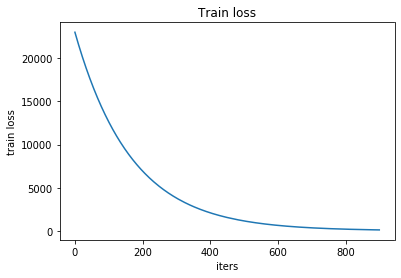

In [77]:
model = LogRegNumpy(llambda = 3, lr=0.001, batch_size=128, n_epochs=100)
model.fit(X_train_bin, y_train_bin)
print('test auc', metrics.roc_auc_score(y_test_bin, model.predict_proba(X_test_bin)))

plt.plot(np.arange(len(model.history)), model.history)
plt.xlabel('iters')
plt.ylabel('train loss')
plt.title('Train loss');

# Multinomial Logistic Regression using pytorch

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split

###  [1 point] implement linear model $Z = XW + b$

In [0]:
class LogRegNN(nn.Module):
    
    def __init__(self, n_features, n_classes):
        super(LogRegNN, self).__init__()
        
        # create tensor of weights and tensor of biases
        # initialize tensors from N(0,1) 
        # W has shape (n_features, n_classes)
        # b has shape (n_classes,)
        self.W = nn.Parameter(torch.randn(n_features, n_classes))
        self.b = nn.Parameter(torch.randn(n_classes))
        
    def forward(self, x):
        """
        In this method we implement connections between neural network weights
        x: batch feature matrix
        returns: probability logits
        """
        # <TODO> implement linear model 
        x_dense = torch.from_numpy(x.todense())
        result = torch.mm(x_dense, self.W) + self.b
        return result

In [81]:
model = LogRegNN(X_train.shape[1], 20)
model(test_batch_X)

RuntimeError: ignored

In [0]:
def train_batch(model, batch_x, batch_y):
    # set NN model in training mode
    model.train()
    
    # zero gradients
    optimizer.zero_grad()
    # forward pass
    pred = model(batch_x)
    # cross-entropy loss
    loss = criterion(pred, batch_y)
    # calculate gradients
    loss.backward()
    # make optimization step
    optimizer.step()
    
    # return batch loss
    return loss.data.detach().item()

def eval_batch(model, batch_x, batch_y):
    # set NN model in evaluation mode
    model.eval()
    
    with torch.no_grad():
        # forward pass
        pred = model(batch_x)
        # cross-entropy loss
        loss = criterion(pred, batch_y)

    # return batch loss
    return loss.data.item()

### [2 points] implement early stopping using early_stopping_patience

In [0]:
from functools import reduce

In [0]:
def train(model, train_loader, valid_loader, n_epochs, early_stopping_patience=5):
    """
    early_stopping_patience - number of consecutive epochs of growing validation loss to wait
    """
    history = {'train': [], 'valid': []}

    # <TODO> implement early stopping using early_stopping_patience
    
    for epoch in range(n_epochs):
        epoch_train_loss = 0
        
        # iterate over batches
        for batch_x, batch_y in tqdm(train_loader, desc=f'epoch:{epoch}', leave=True):

            loss = train_batch(model, batch_x, batch_y)
            epoch_train_loss += loss

        # average loss for epoch
        epoch_train_loss /= len(train_loader)
        history['train'].append(epoch_train_loss)
        
        epoch_valid_loss = 0
        for batch_x, batch_y in valid_loader:
            loss = eval_batch(model, batch_x, batch_y)
            epoch_valid_loss += loss
            
        epoch_valid_loss /= len(valid_loader)
        print(f'train loss: {epoch_train_loss:.3f} valid loss:{epoch_valid_loss:.3f}')
        history['valid'].append(epoch_valid_loss)
        
        # <TODO> implement early stopping using early_stopping_patience
        if len(history['valid']) > early_stopping_patience:
          if reduce(lambda x, y: x < y, history['valid'][-early_stopping_patience:]):
            return history 

    return history 

### predict hard labels [1 point]

In [0]:
def predict(model, test_loader):
    
    model.eval()
    
    result = []
    with torch.no_grad():
        for batch_x in test_loader:
            # <TODO> predict hard labels
            pred = 
            result.append(pred)
    return np.concatenate(result)

DataLoader implements iteration over batches and shuffling

L2 regularization coef is embedded into SGD.weight_decay: 

1. $w^{(t-1)} \leftarrow w^{(t-2)} - \alpha \lambda w^{(t-2)} $  
1. $w^{(t)} \leftarrow w^{(t-1)} - \alpha \nabla_{w} L(w^{(t-1)}) $

here   
$\alpha$ - learning rate  
$\lambda$ - weight-decay = L2 regularization coef

In [0]:
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X_train, y_train, stratify=y_train,
                                                      shuffle=True, test_size=0.2, random_state=42)

batch_size = 256


train_loader = DataLoader(TensorDataset(torch.tensor(X_train2.todense()).float(), torch.tensor(y_train2).long()), 
                          batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(TensorDataset(torch.tensor(X_valid2.todense()).float(), torch.tensor(y_valid2).long()), 
                          batch_size=batch_size)
test_loader = DataLoader(torch.tensor(X_test.todense()).float(), 
                          batch_size=batch_size)

model = LogRegNN(X_train.shape[1], 20)

criterion = nn.CrossEntropyLoss()
# L2 regularization is embeded in 
optimizer = optim.SGD(model.parameters(), lr=10.0, weight_decay=0.0001)

history = train(model, train_loader, valid_loader, 100, 2)


train loss: 3.227 valid loss:2.995



train loss: 2.795 valid loss:2.657



train loss: 2.449 valid loss:2.400



train loss: 2.169 valid loss:2.162



train loss: 1.944 valid loss:1.974



train loss: 1.763 valid loss:1.822



train loss: 1.614 valid loss:1.703



train loss: 1.489 valid loss:1.613



train loss: 1.386 valid loss:1.513



train loss: 1.301 valid loss:1.449



train loss: 1.229 valid loss:1.387



train loss: 1.167 valid loss:1.339



train loss: 1.114 valid loss:1.288



train loss: 1.067 valid loss:1.250



train loss: 1.026 valid loss:1.218



train loss: 0.989 valid loss:1.186



train loss: 0.962 valid loss:1.170



train loss: 0.933 valid loss:1.142



train loss: 0.911 valid loss:1.124



train loss: 0.889 valid loss:1.108



train loss: 0.871 valid loss:1.088



train loss: 0.852 valid loss:1.079



train loss: 0.837 valid loss:1.064



train loss: 0.825 valid loss:1.063



train loss: 0.810 valid loss:1.039



train loss: 0.802 valid loss:1.035



train loss: 0.790 valid loss:1.026



train loss: 0.781 valid loss:1.020



train loss: 0.772 valid loss:1.011



train loss: 0.766 valid loss:1.009



train loss: 0.757 valid loss:1.002



train loss: 0.753 valid loss:0.996



train loss: 0.746 valid loss:0.991



train loss: 0.740 valid loss:0.989



train loss: 0.735 valid loss:0.986



train loss: 0.731 valid loss:0.979



train loss: 0.728 valid loss:0.978



train loss: 0.722 valid loss:0.973



train loss: 0.719 valid loss:0.969



train loss: 0.715 valid loss:0.970



train loss: 0.715 valid loss:0.968



train loss: 0.712 valid loss:0.967



train loss: 0.710 valid loss:0.964



train loss: 0.707 valid loss:0.961



train loss: 0.704 valid loss:0.966



train loss: 0.703 valid loss:0.964
early stopping! best valid loss: 0.961


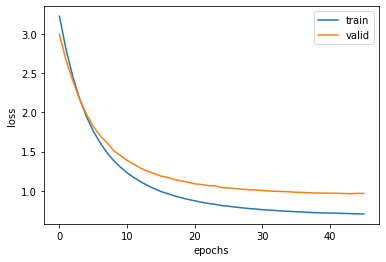

In [0]:
plt.plot(np.arange(len(history['train'])), history['train'], label='train')
plt.plot(np.arange(len(history['valid'])), history['valid'], label='valid')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [0]:
y_pred = predict(model, test_loader)
metrics.accuracy_score(y_test, y_pred)

/Users/denaas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:84: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


0.7947424322889007

### What is the cross-entropy loss of uniformly random guessing classifier for this task? [0.5 point]

### What is the accuracy of constant prediction classifier for this task? [0.5 point]